In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('imdb_movies_shows.csv')
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [ ]:
df = pd.read_csv('imdb_movies_shows.csv')
df.tail()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0
5805,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0


In [ ]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


In [ ]:
blank_genre_mask = df["genres"] == "[]"
df.loc[blank_genre_mask, "genres"] = "NO_GENRE"

In [ ]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [ ]:
df['production_countries'].unique()

array(["['US']", "['GB']", "['US', 'GB']", "['JP']", "['EG']", "['DE']",
       "['IN']", '[]', "['DZ', 'EG']", "['LB']", "['FR', 'LB', 'CA']",
       "['IN', 'SU']", "['US', 'IT']", "['HK', 'US']", "['GB', 'US']",
       "['AR']", "['KW']", "['EG', 'FR']", "['FR', 'LB']", "['US', 'JP']",
       "['US', 'CA']", "['DE', 'US']", "['US', 'DE']", "['CA', 'US']",
       "['US', 'FR']", "['PE', 'US', 'BR']", "['IT', 'US', 'FR']",
       "['US', 'HK']", "['FR', 'IE', 'GB', 'DE']",
       "['GH', 'GB', 'US', 'BF', 'DE']", "['AR', 'ES']", "['FR']",
       "['MX']", "['AU']", "['CO']", "['BE', 'FR', 'NO', 'LB']",
       "['IT', 'LB', 'BE', 'FR']", "['US', 'FR', 'DE', 'PS']", "['TR']",
       "['CA']", "['GB', 'US', 'BS', 'CZ', 'DE']", "['GB', 'US', 'AU']",
       "['DE', 'ES', 'US', 'FR']", "['GB', 'US', 'AU', 'DE']",
       "['JP', 'US']", "['US', 'IS', 'GB']", "['DK']",
       "['NZ', 'JP', 'US']", "['US', 'CA', 'FR']", "['GB', 'US', 'DE']",
       "['US', 'DE', 'IT', 'GB']", "['CA', 'DE', 'US

In [ ]:
df["production_countries"] = df["production_countries"].str.strip('Lebanon').str.replace("LB","")

In [ ]:
list(df.production_countries.unique())

["['US']",
 "['GB']",
 "['US', 'GB']",
 "['JP']",
 "['EG']",
 "['DE']",
 "['IN']",
 '[]',
 "['DZ', 'EG']",
 "['']",
 "['FR', '', 'CA']",
 "['IN', 'SU']",
 "['US', 'IT']",
 "['HK', 'US']",
 "['GB', 'US']",
 "['AR']",
 "['KW']",
 "['EG', 'FR']",
 "['FR', '']",
 "['US', 'JP']",
 "['US', 'CA']",
 "['DE', 'US']",
 "['US', 'DE']",
 "['CA', 'US']",
 "['US', 'FR']",
 "['PE', 'US', 'BR']",
 "['IT', 'US', 'FR']",
 "['US', 'HK']",
 "['FR', 'IE', 'GB', 'DE']",
 "['GH', 'GB', 'US', 'BF', 'DE']",
 "['AR', 'ES']",
 "['FR']",
 "['MX']",
 "['AU']",
 "['CO']",
 "['BE', 'FR', 'NO', '']",
 "['IT', '', 'BE', 'FR']",
 "['US', 'FR', 'DE', 'PS']",
 "['TR']",
 "['CA']",
 "['GB', 'US', 'BS', 'CZ', 'DE']",
 "['GB', 'US', 'AU']",
 "['DE', 'ES', 'US', 'FR']",
 "['GB', 'US', 'AU', 'DE']",
 "['JP', 'US']",
 "['US', 'IS', 'GB']",
 "['DK']",
 "['NZ', 'JP', 'US']",
 "['US', 'CA', 'FR']",
 "['GB', 'US', 'DE']",
 "['US', 'DE', 'IT', 'GB']",
 "['CA', 'DE', 'US']",
 "['HK', 'CN']",
 "['IT', 'US']",
 "['FR', 'JP', 'US']",
 

In [ ]:
netflix_movies = df

In [ ]:
netflix_movies.head ()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [ ]:
netflix_movies = df.dropna(subset=['title'])

In [ ]:
netflix_movies[netflix_movies["title"].isnull()]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes


In [ ]:
netflix_movies = netflix_movies[~netflix_movies["imdb_id"].isnull()]

In [ ]:
netflix_movies[netflix_movies["imdb_id"].isnull()]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes


In [ ]:
netflix_movies.isnull().sum()

title                      0
type                       0
release_year               0
age_certification       2331
runtime                    0
genres                     0
production_countries       0
seasons                 3450
imdb_id                    0
imdb_score                78
imdb_votes                94
dtype: int64

In [ ]:
netflix_movies.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0


In [ ]:
netflix_movies.tail()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5800,Momshies! Your Soul is Mine,MOVIE,2021,NaN,108,['comedy'],['PH'],NaN,tt14412240,5.8,26.0
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0
5805,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0


In [ ]:
netflix_movies['production_countries'] = netflix_movies['production_countries'].str.replace('[','').str.replace(']','')
netflix_movies['production_countries'].head

<bound method NDFrame.head of 1             'US'
2             'GB'
3             'GB'
4             'US'
5             'GB'
           ...    
5800          'PH'
5801          'NG'
5803    'NG', 'CA'
5804              
5805              
Name: production_countries, Length: 5361, dtype: object>

In [ ]:
netflix_movies.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",'US',NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",'GB',NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],'GB',NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],'US',NaN,tt0070047,8.1,391942.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",'GB',4.0,tt0063929,8.8,72895.0


In [ ]:
netflix_movies['genres'] = netflix_movies['genres'].str.replace('[','').str.replace(']','')
netflix_movies['genres'].head

<bound method NDFrame.head of 1                      'crime', 'drama'
2                   'comedy', 'fantasy'
3                              'comedy'
4                              'horror'
5                  'comedy', 'european'
                     ...               
5800                           'comedy'
5801                 'romance', 'drama'
5803                  'family', 'drama'
5804               'action', 'thriller'
5805    'family', 'comedy', 'animation'
Name: genres, Length: 5361, dtype: object>

In [ ]:
netflix_movies.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",'US',NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",'GB',NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,'comedy','GB',NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,'horror','US',NaN,tt0070047,8.1,391942.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",'GB',4.0,tt0063929,8.8,72895.0


In [ ]:
ASSIGNMENT
1. find number of movies released in each decade from 1945, show a line chart to display this
2. show the distribution of run_time features using appropriate chart.
3. show a barchart for movie genres
4. show a barchart for movie genres for children movies
5. which of the genres have the higher runtime on the overall dataset and for each age group

In [ ]:
df['release_year'].unique()

array([1945, 1976, 1975, 1979, 1973, 1969, 1971, 1964, 1980, 1967, 1966,
       1961, 1954, 1958, 1968, 1977, 1972, 1963, 1960, 1956, 1953, 1974,
       1959, 1962, 1978, 1986, 1989, 1984, 1990, 1987, 1983, 1982, 1981,
       1988, 1985, 1995, 2000, 1997, 1994, 1996, 1999, 1998, 1993, 1992,
       1991, 2008, 2010, 2004, 2005, 2003, 2009, 2007, 2006, 2001, 2002,
       2012, 2011, 2014, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2022,
       2021], dtype=int64)

In [ ]:
print(df.dtypes)

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
dtype: object


In [ ]:
movies_by_decades = df[['title', 'type', 'release_year']]
print(movies_by_decades)

                                    title   type  release_year
0     Five Came Back: The Reference Films   SHOW          1945
1                             Taxi Driver  MOVIE          1976
2         Monty Python and the Holy Grail  MOVIE          1975
3                           Life of Brian  MOVIE          1979
4                            The Exorcist  MOVIE          1973
...                                   ...    ...           ...
5801                            Fine Wine  MOVIE          2021
5802                       Edis Starlight  MOVIE          2021
5803                                Clash  MOVIE          2021
5804                       Shadow Parties  MOVIE          2021
5805   Mighty Little Bheem: Kite Festival   SHOW          2021

[5806 rows x 3 columns]


In [ ]:
df['release_year'].value_counts()

release_year
2019    848
2020    805
2018    774
2021    758
2017    580
       ... 
1974      1
1959      1
1962      1
1978      1
1945      1
Name: count, Length: 67, dtype: int64

In [ ]:
df[['title', 'type', 'release_year']].value_counts()


title                            type   release_year
#ABtalks                         SHOW   2018            1
Rurouni Kenshin: The Final       MOVIE  2021            1
Rurouni Kenshin Part I: Origins  MOVIE  2012            1
Running Man                      SHOW   2017            1
Run On                           SHOW   2020            1
                                                       ..
Halston                          SHOW   2021            1
Halloween                        MOVIE  2007            1
Hall Pass                        MOVIE  2011            1
Half Girlfriend                  MOVIE  2017            1
캐치! 티니핑                          SHOW   2020            1
Name: count, Length: 5805, dtype: int64

In [ ]:
df['decade'] = ((df['release_year'] - 1945) // 10) * 10 + 1945
decade_counts = df.groupby('decade').size()


In [ ]:
print(decade_counts)

decade
1945       4
1955       8
1965      14
1975      40
1985      90
1995     200
2005     861
2015    4589
dtype: int64


In [ ]:
pd.cut(df['release_year'],
       bins=range(1945, 2030,10),
       right=False, labels=range(1945,2020,10))

0       1945
1       1975
2       1975
3       1975
4       1965
        ... 
5801    2015
5802    2015
5803    2015
5804    2015
5805    2015
Name: release_year, Length: 5806, dtype: category
Categories (8, int64): [1945 < 1955 < 1965 < 1975 < 1985 < 1995 < 2005 < 2015]

In [ ]:
movies_by_decade = df.groupby('decade').size()

<function matplotlib.pyplot.show(close=None, block=None)>

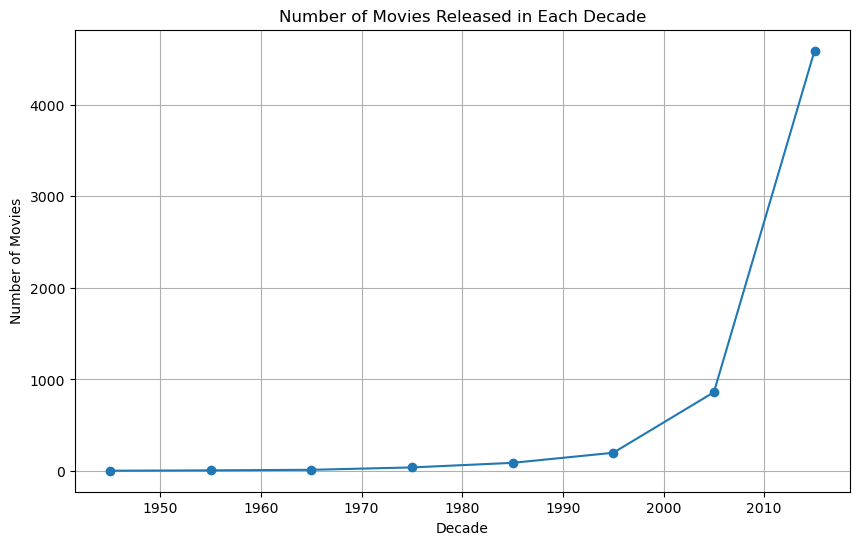

In [ ]:
plt.figure(figsize=(10, 6))
movies_by_decade.plot(kind='line', marker='o')
plt.title('Number of Movies Released in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show

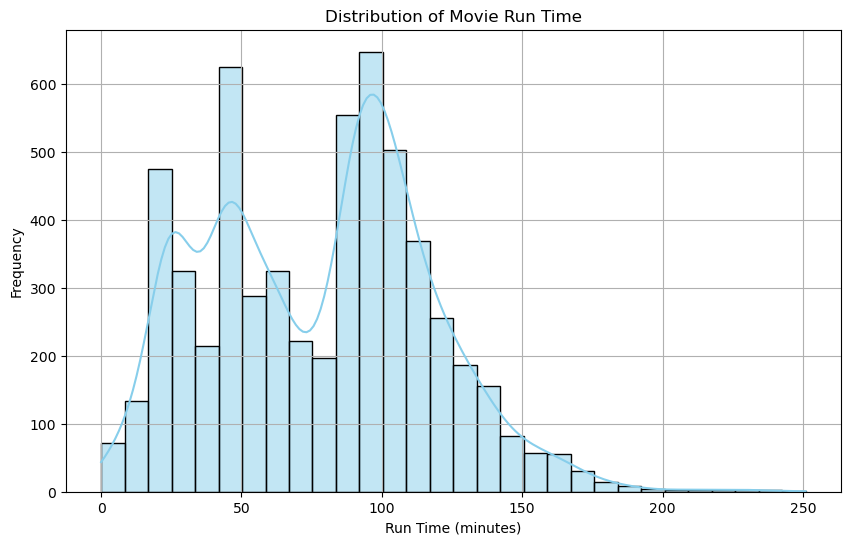

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=30, kde=True, color= 'skyblue')
plt.title('Distribution of Movie Run Time')
plt.xlabel('Run Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
genres_count=df['genres'].str.split(',', expand=True).stack().value_counts()

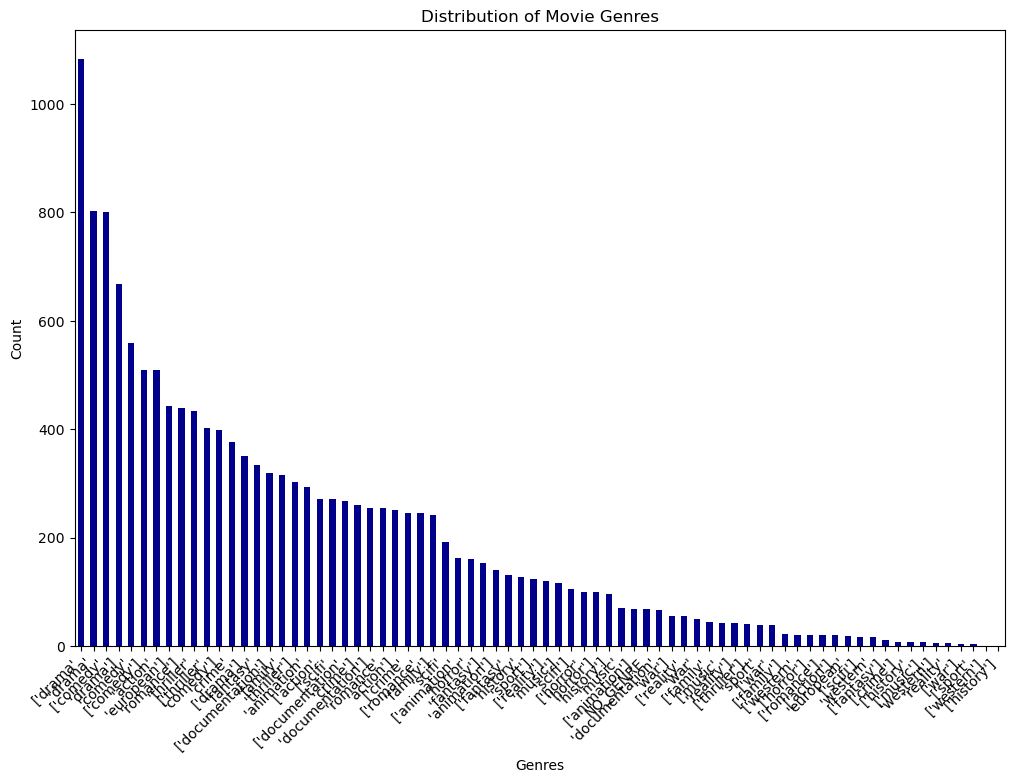

In [ ]:
plt.figure(figsize=(12, 8))
genres_count.plot(kind='bar',color='darkblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
def age_group(age_cert):
    if age_cert in ['TV-MA','R', 'NC-17']:
        return "Adult"
    elif age_cert in ['PG', 'TV-14', 'G', 'PG-13', 'TV-PG']:
        return "Requires supervision"
    elif age_cert in ['TV-Y', 'TV-G', 'TV-Y7']:
        return "Good for children"
    else:
        return "Not Rated"

In [ ]:
df["age_group_rating"] = df["age_certification"].apply(age_group)

In [ ]:
df["age_group_rating"].value_counts()

age_group_rating
Not Rated               2610
Requires supervision    1473
Adult                   1430
Good for children        293
Name: count, dtype: int64

In [ ]:
children_movies = df["age_group_rating"] == "Good for children"

In [ ]:
children_movies_df = df[children_movies]

In [ ]:
children_genres_count= children_movies_df['genres'].str.split(',', expand=True).stack().value_counts()

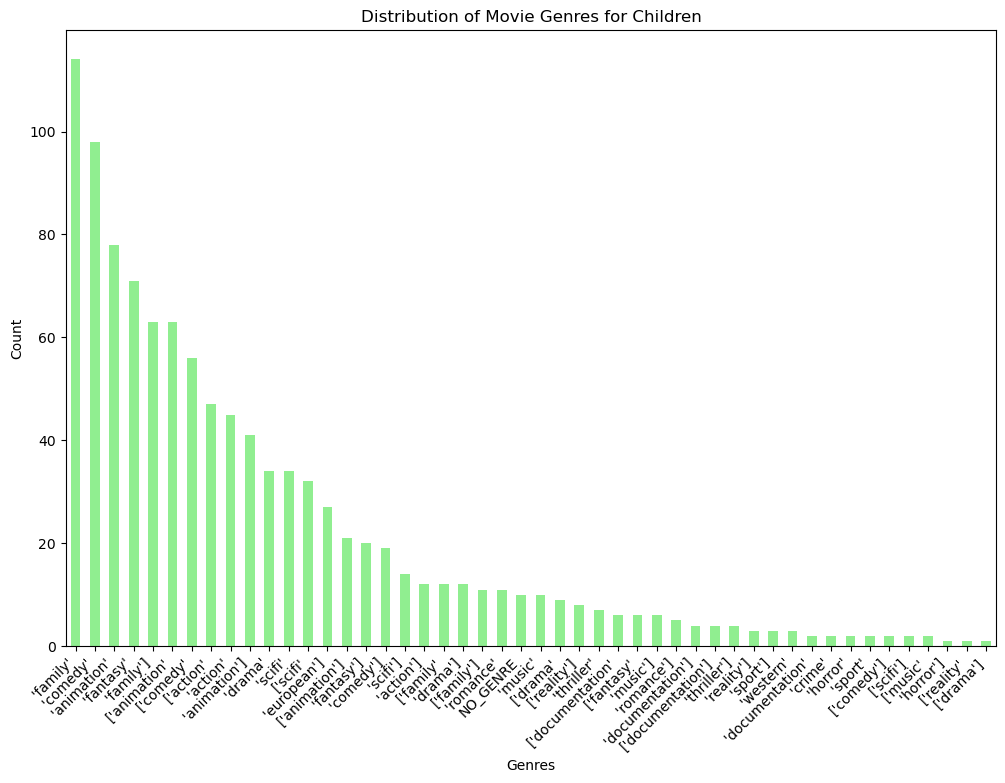

In [ ]:
plt.figure(figsize=(12, 8))
children_genres_count.plot(kind='bar',color='lightgreen')
plt.title('Distribution of Movie Genres for Children')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
overall_highest_runtime_genre = df.groupby('genres')['runtime'].mean().idxmax()
print(f"overall_highest_genre:{overall_highest_genre}")

overall_highest_genre:['romance', 'history', 'war', 'action', 'drama']


In [ ]:
highest_genres_by_age = df.groupby(['age_group_rating','genres'])['runtime'].mean().reset_index()
highest_genres_by_age = highest_genres_by_age.loc[highest_genres_by_age.groupby('age_group_rating')['runtime'].idxmax]

In [ ]:
print ("Highest runtime genre for each age group:")
print(highest_genres_by_age)

Highest runtime genre for each age group:
          age_group_rating                                             genres  \
0                    Adult                                           NO_GENRE   
1                    Adult  ['action', 'animation', 'comedy', 'fantasy', '...   
2                    Adult  ['action', 'animation', 'drama', 'fantasy', 't...   
3                    Adult  ['action', 'animation', 'drama', 'scifi', 'spo...   
4                    Adult          ['action', 'animation', 'drama', 'sport']   
...                    ...                                                ...   
2094  Requires supervision            ['western', 'action', 'crime', 'drama']   
2095  Requires supervision                  ['western', 'action', 'european']   
2096  Requires supervision  ['western', 'action', 'scifi', 'thriller', 'an...   
2097  Requires supervision                    ['western', 'drama', 'history']   
2098  Requires supervision                               ['western'

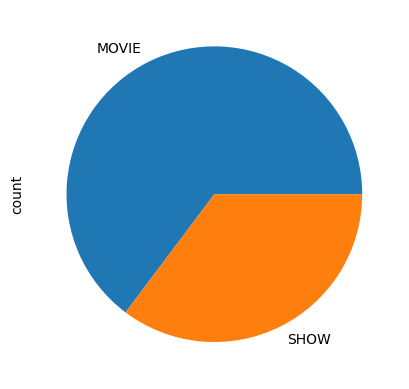

In [ ]:
df['type'].value_counts().plot(kind="pie");